In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('covid_19_clean_complete.csv')
print("Top 5 rows of the dataset:")
print(df.head())

Top 5 rows of the dataset:
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [14]:
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))
print("\nNull values in each column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None

Summary Statistics:
                      Province/State Country/Region           Lat  \
count                          14664          49068  49068.000000   
unique                            78            187           NaN   
top     Australian Capital Territory     

In [13]:
df = df.drop_duplicates()
num_countries = df['Country/Region'].nunique()
print(f"\nNumber of countries in the dataset: {num_countries}")
country_summary = df.groupby('Country/Region')[['Confirmed', 'Recovered', 'Deaths']].max().sort_values(by='Confirmed', ascending=False)
print("\nTop 10 Most Affected Countries (by Confirmed Cases):")
print(country_summary.head(10))


Number of countries in the dataset: 187

Top 10 Most Affected Countries (by Confirmed Cases):
                Confirmed  Recovered  Deaths
Country/Region                              
US                4290259    1325804  148011
Brazil            2442375    1846641   87618
India             1480073     951166   33408
Russia             816680     602249   13334
South Africa       452529     274925    7067
Mexico             395489     303810   44022
Peru               389717     272547   18418
Chile              347923     319954    9187
United Kingdom     300111        533   45759
Iran               293606     255144   15912


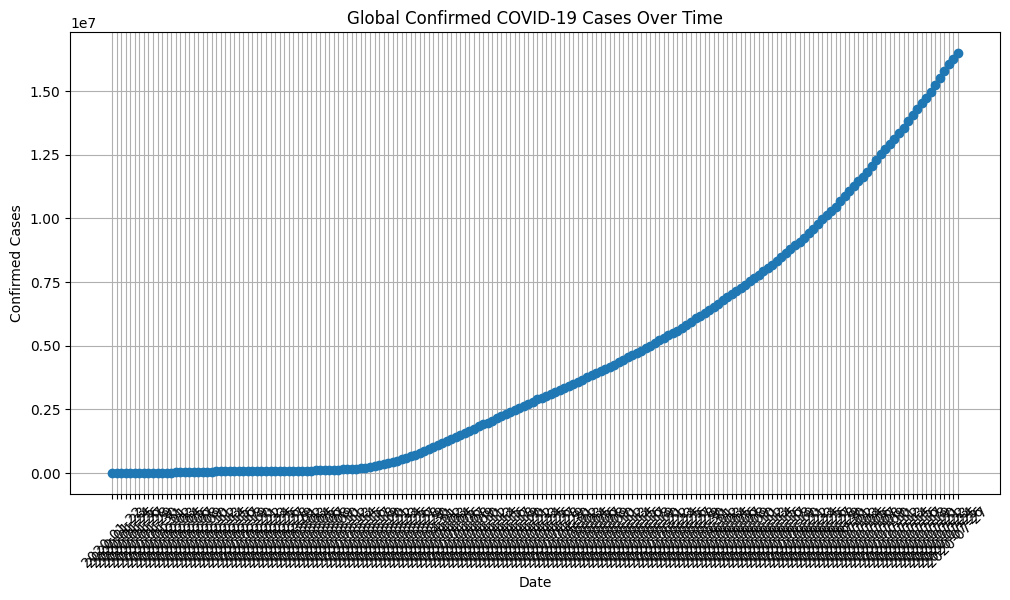

In [11]:
df_date = df.groupby('Date')['Confirmed'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(df_date['Date'], df_date['Confirmed'], marker='o')
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/tmp/ipython-input-9-2078627468.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_deaths.index, y=top10_deaths['Deaths'], palette='Reds_r')


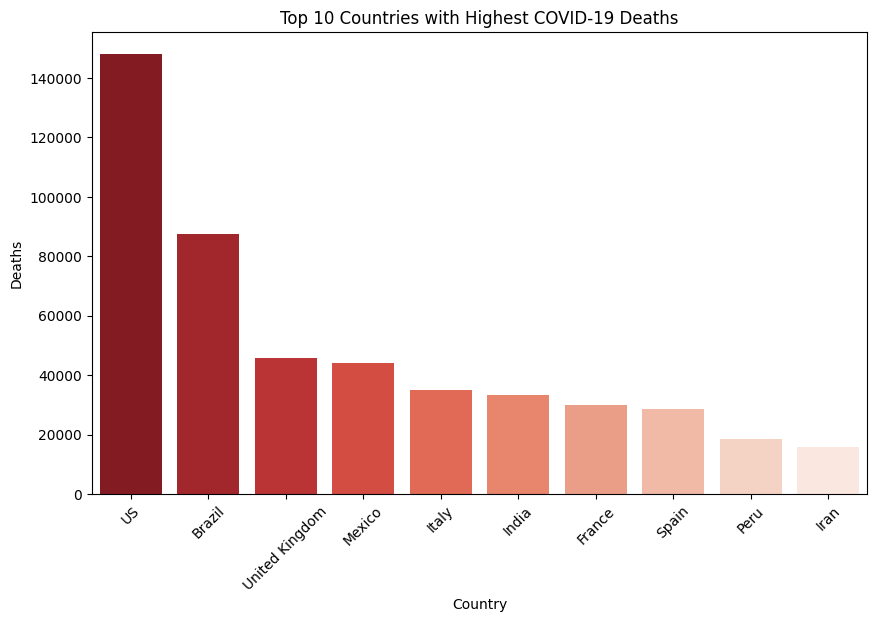

In [9]:
top10_deaths = country_summary.sort_values(by='Deaths', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_deaths.index, y=top10_deaths['Deaths'], palette='Reds_r')
plt.title('Top 10 Countries with Highest COVID-19 Deaths')
plt.ylabel('Deaths')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

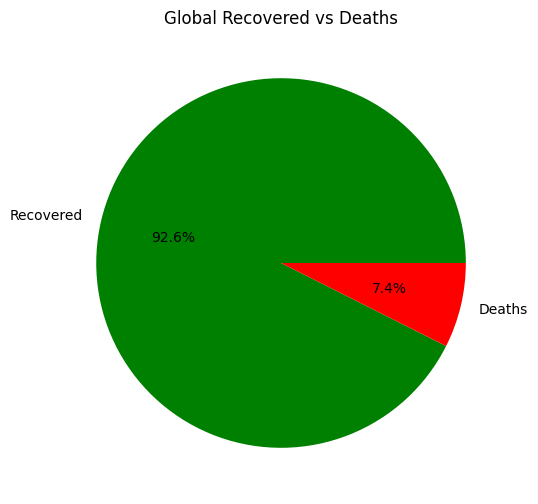

In [7]:
global_recovered = df['Recovered'].max()
global_deaths = df['Deaths'].max()
plt.figure(figsize=(6,6))
plt.pie([global_recovered, global_deaths], labels=['Recovered', 'Deaths'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Global Recovered vs Deaths')
plt.show()

In [6]:
print("\nObservations:")
print(f"- The dataset contains data for {num_countries} countries.")
print("- The line chart shows the overall trend of confirmed cases increasing over time.")
print("- The bar chart highlights the countries with the most reported deaths.")
print("- The pie chart shows the proportion of global recoveries compared to deaths.")



Observations:
- The dataset contains data for 187 countries.
- The line chart shows the overall trend of confirmed cases increasing over time.
- The bar chart highlights the countries with the most reported deaths.
- The pie chart shows the proportion of global recoveries compared to deaths.
